In [1]:
import torch
from torch.autograd import Variable
from utee import selector
model_raw, ds_fetcher, is_imagenet = selector.select('resnet50')
ds_val = ds_fetcher(batch_size=10, train=False, val=True)
for idx, (data, target) in enumerate(ds_val):
    data =  Variable(torch.FloatTensor(data)).cuda()
    output = model_raw(data)

ModuleNotFoundError: No module named 'utee'

In [1]:
import os
import sys
os.chdir("/data/adv_geom/drg/")
from models.classifier import Classifier

In [ ]:
! ls ../

In [ ]:
from training.train_classifier import TrainClassifier

In [ ]:
%tb
args = {
    "train_images_file": "/data/adv_geom/datasets/emnist/train_images.h5",
    "train_codes_file": "/data/adv_geom/datasets/emnist/train_labels.h5",
    "test_images_file": "/data/adv_geom/datasets/emnist/test_images.h5",
    "test_codes_file": "/data/adv_geom/datasets/emnist/test_labels.h5",
    "state_file": "/data/adv_geom/dumps/emnist/classifier.pth.tar",
    "label_index": 0,
    "lr_decay": 0.95,
    "weight_decay": 0.0001,
    "training_samples": 160000,
    "validation_samples": 40000,
    "random_samples": True,
    "network_architecture": "mlp",
    "gpu_id": 1
}

sys.argv = ["-" + i + "=" + str(args[i]) if type(args[i]) != type(True) else "-" + i for i in args]


program = TrainClassifier(args=sys.argv)



In [ ]:
program.load_data()

In [ ]:
program.load_model_and_scheduler()

In [ ]:
test_image = program.test_images[0:8]
test_codes = program.test_codes[0:8]

In [ ]:
import torch

with torch.no_grad():
    program.model.cuda()
    program.model.eval()
    test_image = torch.Tensor(test_image).cuda()
    logits = program.model(test_image)
    

In [ ]:
torch.max(logits, axis=1)[1]

In [ ]:
test_codes

In [ ]:
clf_report = program.test()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow("test.png")

In [ ]:
program.model

In [ ]:
print(clf_report)

In [ ]:
import numpy as np

In [ ]:
leftover_basis = np.eye(5)

In [ ]:
span = leftover_basis.copy()[2:]

In [ ]:
normals = np.zeros((10, 5)) + 2 * leftover_basis[0] + 3 * leftover_basis[1]

In [ ]:
normals + np.random.normal(size=(10, 5)) * np.sum(span, axis=0)

In [ ]:
a = np.arange(10).reshape(-1, 1)
b = np.ones(10)

In [ ]:
a, b

In [ ]:
import os, glob




dump_dir = "/azuredrive/dumps/expC_dist_learner_for_adv_ex/k2n2/actual_dist_learner_w_masked_mse/test_MTMLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=2;k=2;actual_distance}/14062021-090200/models"
os.chdir(dump_dir)
x = None
for root, dirs, files in os.walk(dump_dir):
    if "models" in root and len(files) > 1:
        x = files
        print(root)
        best_model_fn = sorted(x, key=lambda x: int(x.split("_")[-1].split(".")[0]))[-1]
        
        if len(x) > 1:
            for j in x:
                if j != best_model_fn:
                    os.remove(os.path.join(root, j))
            print(root)
            
        
#         for file in files:
#             if file.endswith(".pth"):
#                  print(os.path.join(root, file))


In [ ]:
! ls "/azuredrive/dumps/expC_dist_learner_for_adv_ex/k2n2/actual_dist_learner_w_masked_mse/test_MTMLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=2;k=2;actual_distance}/14062021-090200/models"







In [ ]:
phases = ["train", "val", "test"]
# data_fns = [TRAIN_FN, VAL_FN, TEST_FN]

splits = {i[0]: {"fn": i[1], "name": i[0]} for i in zip(phases, phases)}


In [ ]:
splits

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

X, _ = make_swiss_roll(1000)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20, edgecolor='k')



In [ ]:
from sklearn.utils import check_random_state
def make_swiss_roll2(n_samples=100, *, noise=0.0, random_state=None):
    """Generate a swiss roll dataset.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the S curve.
    noise : float, default=0.0
        The standard deviation of the gaussian noise.
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.
    t : ndarray of shape (n_samples,)
        The univariate position of the sample according to the main dimension
        of the points in the manifold.
    Notes
    -----
    The algorithm is from Marsland [1].
    References
    ----------
    .. [1] S. Marsland, "Machine Learning: An Algorithmic Perspective",
           Chapter 10, 2009.
           http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
    """
#     generator = check_random_state(random_state)
    t = 1 + 2 * np.random.uniform(0, 10, size=(1, n_samples))

    omega = 10
#     t = 1.5 * np.pi * (1 + 2 * generator.rand(1, n_samples))
    x = (t - 5) * np.cos(t / omega)
    y = 21 * np.random.uniform(size=(1, n_samples))

    z = (t - 5) * np.sin(t / omega)

    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)

    return X, t


def make_swiss_roll_std(n_samples=100, *, noise=0.0, random_state=None):
    """Generate a swiss roll dataset.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, default=100
        The number of sample points on the S curve.
    noise : float, default=0.0
        The standard deviation of the gaussian noise.
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : ndarray of shape (n_samples, 3)
        The points.
    t : ndarray of shape (n_samples,)
        The univariate position of the sample according to the main dimension
        of the points in the manifold.
    Notes
    -----
    The algorithm is from Marsland [1].
    References
    ----------
    .. [1] S. Marsland, "Machine Learning: An Algorithmic Perspective",
           Chapter 10, 2009.
           http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
    """
    generator = check_random_state(random_state)
    
    omega = 10
    
    t = 1.5 * np.pi * (1 + 2 * generator.rand(1, n_samples))
#     t = 1 + 2 * np.random.uniform(0, 10, size=(1, n_samples))

    x = t * np.cos(t)
    y = 21 * np.random.uniform(size=(1, n_samples))
    z = t * np.sin(t)

    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)

    return X, t





In [ ]:
X2, t2 = make_swiss_roll_std(100000)
X, t = make_swiss_roll_std(100000)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(0, 90)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='red', s=.001)

ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], edgecolor='k', s=.001)




In [ ]:
t.max()

In [ ]:
X2_sample = X2[0]
t2_sample = t2[0]
# X2_sample = np.array([t2_sample*np.cos(t2_sample), t2_sample*np.sin(t2_sample), -41])
normals_at_X2 = np.zeros_like(X2)
normals_at_X2[:, 0] = np.sin(t2) + t2 * np.cos(t2)
normals_at_X2[:, 2] = -1*np.cos(t2) + t2 * np.sin(t2)
normals_at_X2 = (1.5 / np.linalg.norm(normals_at_X2, ord=2, axis=1)).reshape(-1, 1) * normals_at_X2

off_mfld_pts_at_X2 = X2 + normals_at_X2

# normal_at_X2 = np.array([np.sin(t2_sample) + t2_sample * np.cos(t2_sample), 0, -1*np.cos(t2_sample) + t2_sample * np.sin(t2_sample)])
# normal_at_X2 = (2 / np.linalg.norm(normal_at_X2, ord=2)) * normal_at_X2


plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 2], s=.01, label="X1")
plt.scatter(X2[:, 0], X2[:, 2], s=.01, label="X2")

plt.scatter(off_mfld_pts_at_X2[:, 0], off_mfld_pts_at_X2[:, 2], s=.01, label="off mfld from X2")
plt.legend(markerscale=100)

# plt.scatter(X)
# plt.arrow(X2_sample[0], X2_sample[2], normal_at_X2[0], normal_at_X2[2], head_width=0.5)
random_idx = np.random.choice(np.arange(X2.shape[0]), 10)
for j in range(random_idx.shape[0]):
    i = random_idx[j]
    X2_sample = X2[i]
    normal_at_X2 = normals_at_X2[i]
    
    plt.arrow(X2_sample[0], X2_sample[2], normal_at_X2[0], normal_at_X2[2], head_width=0.2, width=0.001)
plt.show()

In [ ]:
plt.hist(t)

In [ ]:
def identity(x):
    return x

def make_my_swiss_roll(t_min=1.5, t_max=None, num_turns=4, omega=np.pi, num_samples=100000, noise=0, g=identity, correct=True):
    """Generate a swiss roll dataset."""

    if t_max is not None and omega is not None and num_turns is not None:
        assert num_turns == ((t_max - t_min) * omega) / (2 * np.pi), "`num_turns`, `t_max`, and `omega` are incompatible!"
        
    elif t_max is None:
        t_max = t_min + ((2 * np.pi / omega) * num_turns)
        
    elif omega is None:
        omega = (num_turns * 2 * np.pi) / (t_max - t_min)
        
    elif num_turns is None:
        num_turns = ((t_max - t_min) * omega) / (2 * np.pi)
    
    if num_turns < 1:
        print("[warning]: num_turns < 1, might not lead to meaningful dataset")
        if correct:
            scale = omega / np.pi
            t_min = t_min / scale
            t_max = t_max / scale
    
    print("t_min:", t_min, "t_max:", t_max, "omega:", omega, "num_turns:", num_turns, "gap:", 2*np.pi/omega)
    
    t = t_min + (np.random.rand(1, num_samples) * (t_max - t_min))
    
    x = g(t) * np.cos(omega * t)
    y = g(t) * np.sin(omega * t)
    z = 21 * np.random.uniform(size=(1, num_samples))
    
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, num_samples)
    X = X.T
    
    t = np.squeeze(t)
    
    return X, t

In [ ]:
def contract(x, k=np.pi):
    return x - k

from functools import partial

scale = .010
omega = np.pi * scale
t_min = 1.5 
t_max = 4.5 
# t_max = None
contract_partial = partial(contract, k=np.pi/omega)

X1, t1 = make_my_swiss_roll(t_min=t_min, t_max=t_max, num_turns=None, omega=omega)
X2, t2 = make_my_swiss_roll(t_min=t_min, t_max=t_max, num_turns=None, g=contract_partial, omega=omega)

plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1], s=0.01, label="M1")
plt.scatter(X2[:, 0], X2[:, 1], s=0.01, label="M2")
plt.legend(markerscale=100)

In [ ]:
X1

In [ ]:
import os
os.chdir("/data/adv_geom/src/expB/")
from myNNs import *
import torch

In [ ]:
inp = torch.randn((512, 2))
model = MTMLPwithNormalisation(input_size=2, output_size=1)

In [ ]:
model

In [ ]:
model2 = MLPwithNormalisation(input_size=2, output_size=2)
model2(inp).shape

In [ ]:
import os
os.chdir("../src/datagen/synthetic/single/")



In [ ]:
np.argmin(t)

In [ ]:
%run -i sphere.py



In [ ]:
! cat ./test/specs.json

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test.genattrs.points_n[:, 0], test.genattrs.points_n[:, 1], s=0.01)



In [ ]:
import matplotlib.pyplot as plt
plt.scatter(b.genattrs.points_n[:, 0], b.genattrs.points_n[:, 1], s=0.01)



In [ ]:
from collections.abc import Iterable
for i in vars(test._genattrs):
    if isinstance(vars(test._genattrs)[i], Iterable):
        print(i, type(vars(test._genattrs)[i]), (vars(test._genattrs)[i] == vars(b._genattrs)[i]).all())
    else:
        print(i, type(vars(test._genattrs)[i]), (vars(test._genattrs)[i] == vars(b._genattrs)[i]))
        
from collections.abc import Iterable
for i in vars(test._specattrs):
    if isinstance(vars(test._specattrs)[i], Iterable):
        print(i, type(vars(test._specattrs)[i]), (vars(test._specattrs)[i] == vars(b._specattrs)[i]).all())
    else:
        print(i, type(vars(test._specattrs)[i]), (vars(test._specattrs)[i] == vars(b._specattrs)[i]))


In [ ]:
"fix_center" in list(vars(test._genattrs).keys())

In [ ]:
cat test/specs.json

In [ ]:
vars(b.specattrs)

In [ ]:
import os
os.chdir("../src/")

In [ ]:
%run -i datagen_tester.py



In [ ]:
plt.scatter(test.normed_all_points[:, 0], test.normed_all_points[:, 1], s=0.01)

In [ ]:
np.inf == np.inf

In [ ]:
tmp = eval(inspect.getsourcelines(identity)[0][0].strip().split("=")[1].strip())

In [ ]:
identity == tmp

In [ ]:
cat ./test/specs.json

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib
from mpl_toolkits import mplot3d as p3
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [ ]:
x_cn = np.random.normal(size=3)
v_1 = np.random.normal(size=3)
v_1 = v_1 / np.linalg.norm(v_1 - x_cn, ord=2)
v_2 = np.random.normal(size=3)
v_2 = v_2 / np.linalg.norm(v_2 - x_cn, ord=2)

b_1 = v_1 - x_cn
b_2 = v_2 - x_cn
b_2 = b_2 - np.dot(b_1, b_2) * b_1

coefficients = np.random.uniform(size=(100000, 2))
span = coefficients[:, 0].reshape(-1, 1) * b_1 + coefficients[:, 1].reshape(-1, 1) * b_2
span = span + x_cn

# fig = plt.figure()
# ax = p3.Axes3D(fig)
# # ax.view_init(0, 90)
# ax.scatter(span[:, 0], span[:, 1], span[:, 2], edgecolor='red', s=.01)
# ax.scatter(x_cn[0], x_cn[1], x_cn[2], edgecolors="k", s=10)
# ax.scatter(v_1[0], v_1[1], v_1[2], edgecolors="k", s=10)
# ax.scatter(v_2[0], v_2[1], v_2[2], edgecolors="k", s=10)


df = pd.DataFrame({"x": span[:, 0], "y": span[:, 1], "z": span[:, 2]})
fig = px.scatter_3d(df, x='x', y='y', z='z', opacity=0.2)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=1))
fig.show()

In [ ]:
np.dot(b_1, b_2)

In [ ]:
func = 'lambda x: x + 2'
a = eval(func)
b = lambda x: a(x) - 2
a(2), b(3)

In [ ]:
import os
os.chdir("../src/")
%run datagen_tester.py

In [ ]:
plt.scatter(train_set.normed_all_points[:, 0], train_set.normed_all_points[:, 1], s=0.01)

In [ ]:
from sklearn.metrics import classification_report

a = np.ones(5)
b = np.ones(5)

classification_report(a, b, output_dict=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(6, 6))
img=mpimg.imread('/azuredrive/dumps/expC_dist_learner_for_adv_ex/rdm_swrolls/rdm_swiss_rolls_k2n3/1/plots/fig-1.png')
imgplot = plt.imshow(img)

In [ ]:
import os
os.chdir("../src/")

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
from datagen.synthetic.multiple.intertwinedswissrolls import IntertwinedSwissRolls
import matplotlib.pyplot as plt

train_set, val_set, test_set = IntertwinedSwissRolls.make_train_val_test_splits()

In [ ]:
train_set.normed_all_points

In [ ]:
plt.scatter(val_set.normed_all_points[:, 0], val_set.normed_all_points[:, 1], s=0.01)

In [ ]:

df = pd.DataFrame({"x": val_set.normed_all_points[:, 0],\
     "y": val_set.normed_all_points[:, 1],\
     "z": val_set.normed_all_points[:, 2]})
fig = px.scatter_3d(df, opacity=0.3, x="x", y="y", z="z")
fig.update_traces(marker=dict(size=2))

In [ ]:
import re
import numpy as np
import torch

k_dim_samples = np.zeros((val_set.N, 2))
start = 0
for attr in vars(val_set):
    if len(re.findall(r'S[0-9]+', attr)) > 0:
        N_attr = getattr(val_set, attr).genattrs.N
        k_dim_samples[start:start + N_attr//2] = getattr(val_set, attr).genattrs.points_k
        k_dim_samples[start + N_attr//2:start + N_attr] = getattr(val_set, attr).genattrs.pre_images_k
        start += N_attr
k_dim_samples = val_set.all_points_k
low = (1 - np.sign(np.min(k_dim_samples)) * 0.1) * np.min(k_dim_samples) 
high = (1 + np.sign(np.max(k_dim_samples)) * 0.1) * np.max(k_dim_samples)

In [ ]:
gen_2d_grid = np.random.uniform(low, high, size=(100000, 2))

plt.scatter(gen_2d_grid[:, 0], gen_2d_grid[:, 1])
plt.scatter(k_dim_samples[:, 0], k_dim_samples[:, 1])

In [ ]:
gen_nd_grid = np.zeros((100000, 3))

gen_nd_grid[:, :2] = gen_2d_grid
gen_nd_grid += val_set.translation
gen_nd_grid = np.dot(val_set.rotation, gen_nd_grid.T).T
gen_nd_grid = gen_nd_grid / val_set.norm_factor
gen_nd_grid = torch.from_numpy(gen_nd_grid).float()
gen_nd_grid = gen_nd_grid - val_set.anchor + val_set.fix_center


In [ ]:
df2 = pd.DataFrame({
    "x": gen_nd_grid[:, 0],
    "y": gen_nd_grid[:, 1],
    "z": gen_nd_grid[:, 2]
})

df = df.append(df2, ignore_index=True)

fig = px.scatter_3d(df, opacity=0.3, x="x", y="y", z="z")
fig.update_traces(marker=dict(size=2, color=["red"]*val_set.normed_all_points.shape[0] + ["yellow"]*gen_nd_grid.shape[0]))

In [1]:
import os
os.chdir("/data/adv_geom/src")


In [2]:
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

In [3]:
train_set, val_set, test_set = ConcentricSpheres.load_splits("/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k500n500_noninfsmoothdist_2/data/")




In [9]:
import torch
rdm_idx = np.random.choice(np.arange(250000), 100000)
dist_mat = torch.cdist(train_set.normed_all_points[train_set.class_labels == 1][rdm_idx], train_set.normed_all_points[train_set.class_labels == 1][100000:], p=2)




In [29]:
rdm_idx = np.random.choice(np.arange(250000), 100000)

train_set.normed_all_points[train_set.class_labels == 1][rdm_idx]

tensor([[ 0.0777,  0.0160,  0.0401,  ...,  0.0546,  0.0718,  0.0954],
        [-0.0315, -0.0361,  0.0454,  ...,  0.0216, -0.0714,  0.1306],
        [ 0.0123,  0.0353,  0.0919,  ..., -0.0163,  0.0620, -0.0003],
        ...,
        [-0.0275,  0.0221, -0.0269,  ..., -0.0719,  0.0349,  0.0138],
        [ 0.0229, -0.0533,  0.0858,  ..., -0.0551, -0.1414, -0.0647],
        [ 0.0379, -0.0754, -0.0326,  ...,  0.0350, -0.0303,  0.0174]])

In [10]:
# min_dist_val_to_train = dist_mat.min(axis=1)[0]
min_dist_train_subset_to_train = dist_mat.min(axis=1)[0]

In [11]:
import numpy as np
# min_dist_val_to_train /= np.sqrt(500)
min_dist_train_subset_to_train /= np.sqrt(500)

(array([5.0000e+00, 1.2000e+01, 9.0000e+01, 4.0400e+02, 1.6880e+03,
        6.0580e+03, 1.8729e+04, 3.9666e+04, 3.0540e+04, 2.8080e+03]),
 array([0.06962712, 0.07016013, 0.07069314, 0.07122613, 0.07175914,
        0.07229215, 0.07282516, 0.07335816, 0.07389116, 0.07442417,
        0.07495718], dtype=float32),
 <BarContainer object of 10 artists>)

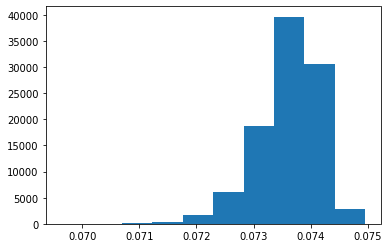

In [12]:
import matplotlib.pyplot as plt

plt.hist(min_dist_train_subset_to_train.numpy())


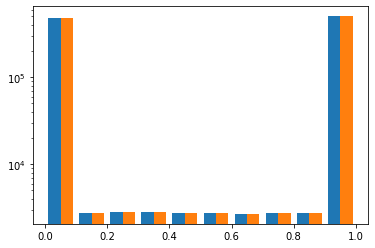

In [9]:
plt.hist(train_set.normed_all_smooth_distances.numpy(), log=True)
plt.show()

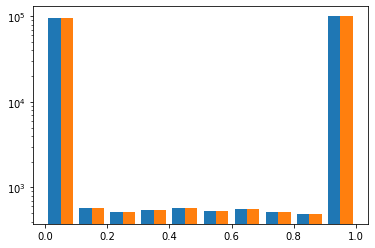

In [10]:
plt.hist(val_set.normed_all_smooth_distances.numpy(), log=True)
plt.show()

In [12]:
torch.linalg.norm(train_set.normed_all_points[train_set.class_labels == 0], dim=1)

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])

In [24]:
torch.linalg.norm(train_set.normed_all_points[train_set.class_labels == 0], dim=1) - 1.,\
torch.linalg.norm(val_set.normed_all_points[val_set.class_labels == 0], dim=1) - 1.


(tensor([-1.1921e-07, -1.1921e-07, -1.7881e-07,  ..., -5.9605e-08,
         -1.7881e-07, -2.3842e-07]),
 tensor([-5.9605e-08, -1.7881e-07,  0.0000e+00,  ...,  2.3842e-07,
         -5.9605e-08, -5.9605e-08]))

In [14]:
train_set.normed_all_smooth_distances[train_set.class_labels == 1]

tensor([[ 1.0000e+00,  6.6613e-16],
        [ 1.0000e+00, -6.6613e-16],
        [ 1.0000e+00,  1.1102e-15],
        ...,
        [ 1.0000e+00, -4.4409e-16],
        [ 1.0000e+00, -2.2204e-16],
        [ 1.0000e+00,  1.1102e-15]])

In [65]:
x = 2 if True else 3
x

2

In [4]:
import os
os.chdir("/data/adv_geom/src")
import copy

# from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres
from datagen.synthetic.single.sphere import RandomSphere
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [1]:
dummy_params = {

    "N": 100000,
    "num_neg": 50000,
    "n": 500,
    "k": 2,
    "r": 0.5,
    "D": 0.2,
    "max_norm": 0.25,
    "mu": 0,
    "sigma": 1,
    "seed": 42,
    "gamma": 1,
    "online": True,
    "off_online": False,
    "augment": True

}

test_sphere = RandomSphere(**dummy_params)

NameError: name 'RandomSphere' is not defined

In [2]:
cs_splits_params = {
    "train": {
        "N": 100,
        "num_neg": 50,
        "n": 2,
        "k": 2,
        "r": 10,
        "g": 5,
        "D": 0.07,
        "max_norm": 2.5,
        "bp": 0.09,
        "M": 1.0,
        "mu": 0,
        "sigma": 1,
        "seed": 23,
        "normalize": True,
        "gamma": 0,
        "norm_factor": 1.0,
        "online": True,
        "augment": True,
        "off_online": True
    }
}

cs_splits_params["val"] = copy.deepcopy(cs_splits_params["train"])
cs_splits_params["val"]["seed"] = 101

cs_splits_params["test"] = copy.deepcopy(cs_splits_params["train"])
cs_splits_params["test"]["seed"] = 89

train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits(cs_splits_params)

27-01-2022 08:26:43 -- [I] root >> [ConcentricSpheres]: starting with split generation
27-01-2022 08:26:43 -- [I] root >> [ConcentricSpheres]: generating train set...
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: generated centre
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: generated points in k-dim
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: pre-images generated
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: normalization complete
27-01-2022 08:26:43 -- [I] root >> [ConcentricSpheres]: Generated S1
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: generated centre
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: generated points in k-dim
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: pre-images generated
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
27-01-2022 08:26:43 -- [I] root >> [RandomSphere]: normalization complete
27-01-2022

In [3]:
train_dl = DataLoader(train_set, batch_size=512, num_workers=8, shuffle=True)
val_dl = DataLoader(val_set, batch_size=512, num_workers=8, shuffle=True)
test_dl = DataLoader(test_set, batch_size=512, num_workers=8, shuffle=True)

dataloaders = {
    "train": train_dl,
    "val": val_dl,
    "test": test_dl
}


In [4]:
train_set.S1.genattrs.pre_images_k.shape

(3, 2)

In [5]:
train_set.S1.genattrs.N

50

  0%|          | 0/3 [00:00<?, ?it/s]

27-01-2022 08:26:49 -- [I] root >> [ConcentricSpheres]: Re-sampling points with seed=11
27-01-2022 08:26:49 -- [I] root >> [ConcentricSpheres]: Starting re-sampling from S1
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: no seed provided. proceeding with current seed
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: pre-images generated
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: normalization complete
27-01-2022 08:26:49 -- [I] root >> [ConcentricSpheres]: Re-sampling from S1 done
27-01-2022 08:26:49 -- [I] root >> [ConcentricSpheres]: Starting re-sampling from S2
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: no seed provided. proceeding with current seed
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: pre-images generated
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
27-01-2022 08:26:49 -- [I] root >> [RandomSphere]: normalization complete
2

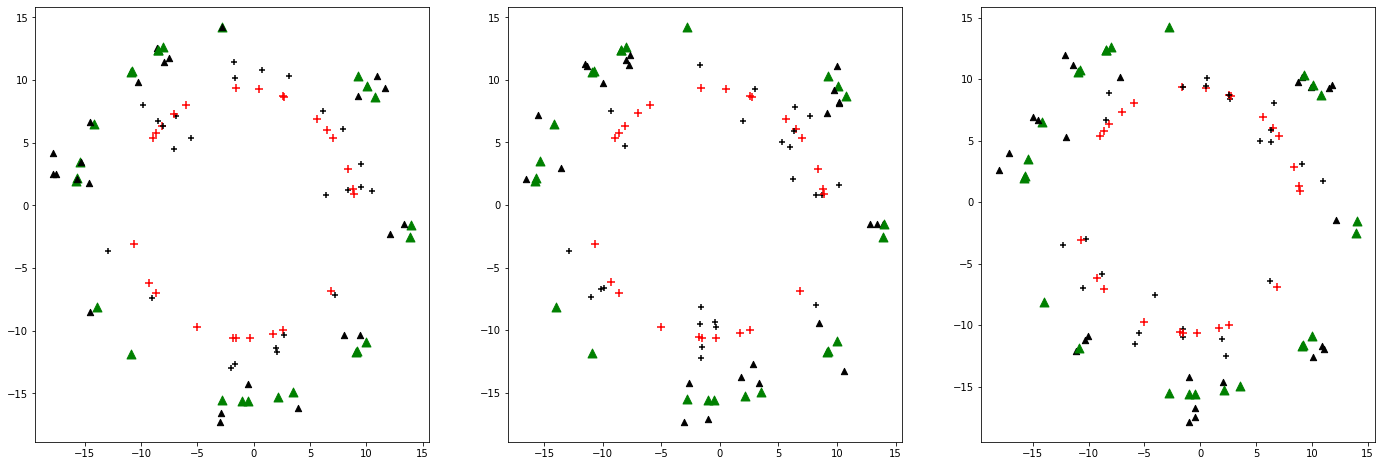

In [4]:
online = True
num_epochs = 3
colors = ["red", "green", "black"]
markers = ["+", "^", "o"]
sizes = [80., 80, 40]

book = []

fig, axs = plt.subplots(1, num_epochs, figsize=(24, 8))
distances = None
for epoch in tqdm(range(num_epochs)):
   
    for phase in ["train", "val"]:
        
        dl = dataloaders[phase]
        
        if online and epoch > 0:
            dl.dataset.resample_points(epoch + 10)
        
        for (i, j) in enumerate(dl):
            
            if i == 0 and phase == "train":
                book.append(j)
            
            points = j["normed_points"]
            distances = j["normed_actual_distances"]
            classes = j["classes"]
            pre_classes = j["pre_classes"]
            
            
            if phase == "train": 
                for idx in range(j["points"].shape[0]):
                    axs[epoch].scatter(j["points"][idx, 0], j["points"][idx, 1], c=colors[j["classes"][idx]], marker=markers[j["pre_classes"][idx]], s=sizes[j["classes"][idx]])
            
    
#         train_set.resample_points(epoch + 10)
            
plt.show()

In [8]:
book[0]

{'points': tensor([[-1.2328, -1.8973],
         [-0.3078,  0.1272],
         [-1.7463, -1.6652],
         [-1.0291,  0.3734],
         [-0.0884,  0.3334],
         [-0.4768,  0.5793],
         [-1.8930, -1.5371],
         [-1.4873, -1.8161],
         [-0.1135, -1.0794],
         [-1.9092, -0.9599],
         [-1.0348, -1.6224],
         [-1.5418,  0.5413],
         [ 0.2799, -0.2975],
         [-0.2720, -1.7233],
         [-2.0869,  0.0356],
         [-0.2471, -1.7072],
         [-1.6816, -1.7107],
         [-0.1685, -0.0228],
         [ 0.2336, -1.1232],
         [-0.1897,  0.0043],
         [-1.4955, -1.4737],
         [-0.9316, -1.9242],
         [-0.8802,  0.6724],
         [-2.2666, -0.5932],
         [-0.7008, -1.5886],
         [-0.1604,  0.3948],
         [-0.1237, -1.0558],
         [-0.8995, -1.6224],
         [-1.8994, -0.2631],
         [-0.8780,  0.6722],
         [-0.8418, -1.8803],
         [-0.1319,  0.3716],
         [-1.8259, -1.1369],
         [-0.3175, -1.3851],
    

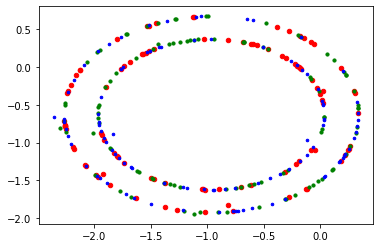

In [7]:
for i in range(len(book)):
    colors = ["red", "green", "blue"]
    plt.scatter(book[i]["points"][:, 0], book[i]["points"][:, 1], c=colors[i], s=20 / (i+1))

In [11]:
len(book)

3

In [8]:
book[1]

{'points': tensor([[-1.8259, -1.1369],
         [-0.3377,  0.1524],
         [-1.4955, -1.4737],
         [-1.6830,  0.0734],
         [-1.4757, -1.4857],
         [-0.1867, -1.2500],
         [-0.1314, -1.6206],
         [-0.7008, -1.5886],
         [-0.5633,  0.2902],
         [ 0.2182, -1.1589],
         [-0.2183, -1.2876],
         [-1.4550,  0.5802],
         [-2.1265, -0.0368],
         [-0.1475,  0.3845],
         [-0.0306, -0.2740],
         [-0.1779, -0.0105],
         [-0.0512, -1.0929],
         [-0.1779,  0.4084],
         [-1.8025,  0.3712],
         [-2.2365, -0.3445],
         [-0.6106, -1.5590],
         [-1.4673,  0.2411],
         [ 0.3328, -0.6062],
         [-1.5193,  0.5521],
         [-0.2036,  0.0212],
         [-2.0784, -1.2991],
         [ 0.1806, -0.0140],
         [-2.2522, -0.8203],
         [-0.3078,  0.1272],
         [-0.3175, -1.3851],
         [-0.1897,  0.0043],
         [-1.9364, -0.8702],
         [-2.2292, -0.3135],
         [ 0.3020, -0.3425],
    

In [7]:
import torch
np.array(torch.zeros(5))

array([0., 0., 0., 0., 0.], dtype=float32)

In [16]:
class TestDataset(Dataset):
    
    def __init__(self, N, online=True):
        
        self.N = N
        self.constant = -1
#         self.online = online
#         self.data = None
        
    def __len__(self):
        return self.N
        
    def __getitem__(self, idx):
        return self.constant + idx
    
    def set_constant(self, c):
        self.constant = c
#         if self.online:
# #             print({"idx":idx, "samples": np.random.normal(size=50), "distance": np.random.uniform(size=(1, 1))})
#             return {"idx":idx, "samples": np.random.normal(size=50),  "distance": np.array([2])}
#         else:
#             return self.data[idx]

In [17]:
tdset = TestDataset(24)

In [18]:
test_dl = DataLoader(tdset, batch_size=4, num_workers=3, shuffle=True)
num_epochs=5
for epoch in range(num_epochs):
#     tdset.set_constant(epoch)
    test_dl.dataset.set_constant(epoch)
    for (i, j) in tqdm(enumerate(test_dl)):
        print("epoch: ", epoch, "i: ", i, "j: ", j)
#         points = j["normed_points_n"]
#         distances = j["normed_actual_distances"]
#--
#     if online:
#         seed_everything(epoch)
#         test_sphere.resample_offmfld()

|          | 0/? [00:00<?, ?it/s]

epoch:  0 i:  0 j:  tensor([ 3,  4, 14,  1])
epoch:  0 i:  1 j:  tensor([23, 11,  8,  0])
epoch:  0 i:  2 j:  tensor([22,  6, 20, 21])
epoch:  0 i:  3 j:  tensor([10, 12,  5,  2])
epoch:  0 i:  4 j:  tensor([ 7, 13,  9, 15])
epoch:  0 i:  5 j:  tensor([18, 19, 16, 17])


|          | 0/? [00:00<?, ?it/s]

epoch:  1 i:  0 j:  tensor([ 5, 23, 12,  9])
epoch:  1 i:  1 j:  tensor([ 2, 21,  6,  4])
epoch:  1 i:  2 j:  tensor([11, 18,  3,  8])
epoch:  1 i:  3 j:  tensor([16, 15, 20, 13])
epoch:  1 i:  4 j:  tensor([14, 19, 22,  7])
epoch:  1 i:  5 j:  tensor([ 1, 17, 24, 10])


|          | 0/? [00:00<?, ?it/s]

epoch:  2 i:  0 j:  tensor([15, 25,  7, 18])
epoch:  2 i:  1 j:  tensor([ 9, 13,  2, 11])
epoch:  2 i:  2 j:  tensor([ 5, 23, 12, 10])
epoch:  2 i:  3 j:  tensor([ 3, 16,  6, 22])
epoch:  2 i:  4 j:  tensor([ 8, 21, 20, 14])
epoch:  2 i:  5 j:  tensor([ 4, 19, 17, 24])


|          | 0/? [00:00<?, ?it/s]

epoch:  3 i:  0 j:  tensor([16, 13,  9, 17])
epoch:  3 i:  1 j:  tensor([18, 25, 23, 19])
epoch:  3 i:  2 j:  tensor([15,  4,  8, 11])
epoch:  3 i:  3 j:  tensor([ 6,  7,  3, 26])
epoch:  3 i:  4 j:  tensor([21, 20, 22, 10])
epoch:  3 i:  5 j:  tensor([14, 12,  5, 24])


|          | 0/? [00:00<?, ?it/s]

epoch:  4 i:  0 j:  tensor([20, 15,  8, 17])
epoch:  4 i:  1 j:  tensor([26, 18, 22, 11])
epoch:  4 i:  2 j:  tensor([12, 16, 21,  6])
epoch:  4 i:  3 j:  tensor([27, 14,  7, 19])
epoch:  4 i:  4 j:  tensor([25, 23, 24, 13])
epoch:  4 i:  5 j:  tensor([ 4,  5, 10,  9])


In [6]:
import torch
torch.is_tensor(np.zeros(5))

False

In [6]:
import seaborn as sns

Text(0.5, 15.0, 'pred')

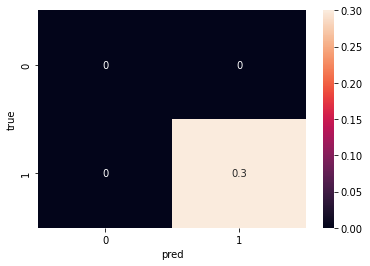

In [33]:
sns.heatmap(np.array([[0, 0], [0, 0.3]]), annot=True)
plt.ylabel("true")
plt.xlabel("pred")

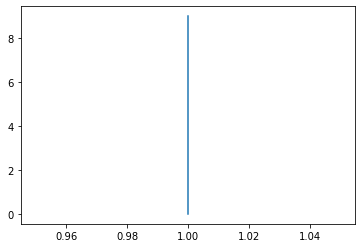

In [12]:
plt.plot(np.ones(10), np.arange(10))

In [24]:
import torch
a = torch.zeros(10, 2)
b = torch.zeros(10).long()
b[5:] += 1
a, b

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [27]:
a[np.arange(a.shape[0]), b] = 1
a[np.arange(a.shape[0]), ~b] = 2

In [28]:
a

tensor([[1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.],
        [2., 1.],
        [2., 1.],
        [2., 1.],
        [2., 1.],
        [2., 1.]])

In [1]:
import pandas as pd
import numpy as np
column_names = ['1', '2', '3']
row_names    = ['2', '3']

matrix = np.reshape((1, 2, 3, 4, 5, 6), (2, 3))
df = pd.DataFrame(matrix, columns=column_names, index=row_names)
df = df.rename_axis("true labels", axis="index")
df = df.rename_axis("pred labels", axis="columns")
df


pred labels,1,2,3
true labels,,,
2,1,2,3
3,4,5,6


In [2]:
import os
import pathlib

tmp = pathlib.Path("../../dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k2n500_noninfdist/1/")
tmp.name

'1'

In [4]:
tmp.parent.name

'rdm_concspheres_k2n500_noninfdist'

In [52]:
df.columns

Index(['1', '2', '3'], dtype='object', name='pred labels')

Text(0.5, 15.0, 'Pred Labels')

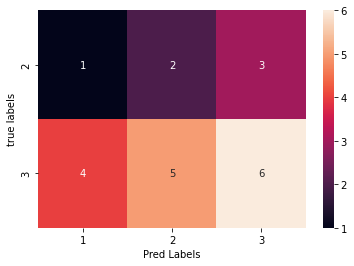

In [42]:
sns.heatmap(df, annot=True)
plt.xlabel("Pred Labels")

In [62]:
df.to_json("test.csv", orient="table")

In [61]:
pd.read_csv("test.csv", index_col=0)

,1,2,3
true labels,,,
2,1,2,3
3,4,5,6


In [63]:
import json
with open("/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/attack_perfs_on_runs/20/all_attack_perfs.json") as f:
    master_json = json.load(f)

In [65]:
master_df = pd.DataFrame(master_json)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50000},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50000},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 100000},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 100000}}

In [5]:
os.path.exists("../datasets/")

True

In [5]:
dset_dir = "/data/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k100n500_noninfdist_moreoffmfld/data"
train_set, val_set, test_set = ConcentricSpheres.make_train_val_test_splits()


17-02-2022 10:15:23 -- [I] root >> [ConcentricSpheres]: starting with split generation
17-02-2022 10:15:23 -- [I] root >> [ConcentricSpheres]: generating train set...
17-02-2022 10:15:23 -- [I] root >> [RandomSphere]: generated centre
17-02-2022 10:15:23 -- [I] root >> [RandomSphere]: generated points in k-dim
17-02-2022 10:15:23 -- [I] root >> [RandomSphere]: pre-images generated
17-02-2022 10:15:50 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
17-02-2022 10:15:59 -- [I] root >> [RandomSphere]: normalization complete
17-02-2022 10:15:59 -- [I] root >> [ConcentricSpheres]: Generated S1
17-02-2022 10:15:59 -- [I] root >> [RandomSphere]: generated centre
17-02-2022 10:15:59 -- [I] root >> [RandomSphere]: generated points in k-dim
17-02-2022 10:15:59 -- [I] root >> [RandomSphere]: pre-images generated
17-02-2022 10:16:26 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
17-02-2022 10:16:34 -- [I] root >> [RandomSphere]: normalization complete
17-02-2022

In [6]:
ConcentricSpheres.save_splits(train_set, val_set, test_set, "./test_data")

17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (_x_ck) saved to: ./test_data/train/_x_ck.pkl
17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (_x_cn) saved to: ./test_data/train/_x_cn.pkl
17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (_rotation) saved to: ./test_data/train/_rotation.pkl
17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (_translation) saved to: ./test_data/train/_translation.pkl
17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (_anchor) saved to: ./test_data/train/_anchor.pkl
17-02-2022 10:17:16 -- [I] root >> [ConcentricSpheres]: data attribute (all_points_k) saved to: ./test_data/train/all_points_k.pkl
17-02-2022 10:17:23 -- [I] root >> [ConcentricSpheres]: data attribute (all_points) saved to: ./test_data/train/all_points.pkl
17-02-2022 10:17:23 -- [I] root >> [ConcentricSpheres]: data attribute (all_distances) saved to: ./test_data/train/all_distances.pk

17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (_anchor) saved to: ./test_data/val/S2_dump/_anchor.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (points_k) saved to: ./test_data/val/S2_dump/points_k.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (pre_images_k) saved to: ./test_data/val/S2_dump/pre_images_k.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (points_n_trivial_) saved to: ./test_data/val/S2_dump/points_n_trivial_.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (points_n_tr_) saved to: ./test_data/val/S2_dump/points_n_tr_.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (points_n_rot_) saved to: ./test_data/val/S2_dump/points_n_rot_.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (points_n) saved to: ./test_data/val/S2_dump/points_n.pkl
17-02-2022 10:17:50 -- [I] root >> [RandomSphere]: data attribute (actual_distances) saved

17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (points_n_tr_) saved to: ./test_data/test/S2_dump/points_n_tr_.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (points_n_rot_) saved to: ./test_data/test/S2_dump/points_n_rot_.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (points_n) saved to: ./test_data/test/S2_dump/points_n.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (actual_distances) saved to: ./test_data/test/S2_dump/actual_distances.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (distances) saved to: ./test_data/test/S2_dump/distances.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (fix_center) saved to: ./test_data/test/S2_dump/fix_center.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (normed_points_n) saved to: ./test_data/test/S2_dump/normed_points_n.pkl
17-02-2022 10:17:51 -- [I] root >> [RandomSphere]: data attribute (norm

(<datagen.synthetic.multiple.concentricspheres.ConcentricSpheres at 0x7f62551a3ba8>,
 <datagen.synthetic.multiple.concentricspheres.ConcentricSpheres at 0x7f61bb2d7550>)

In [7]:
train_set_loaded, val_set_loaded, test_set_loaded = ConcentricSpheres.load_splits("./test_data")

17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (_x_ck) loaded from file: ./test_data/train/_x_ck.pkl
17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (_x_cn) loaded from file: ./test_data/train/_x_cn.pkl
17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (_rotation) loaded from file: ./test_data/train/_rotation.pkl
17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (_translation) loaded from file: ./test_data/train/_translation.pkl
17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (_anchor) loaded from file: ./test_data/train/_anchor.pkl
17-02-2022 10:18:40 -- [I] root >> [ConcentricSpheres]: data attribute (all_points_k) loaded from file: ./test_data/train/all_points_k.pkl
17-02-2022 10:18:42 -- [I] root >> [ConcentricSpheres]: data attribute (all_points) loaded from file: ./test_data/train/all_points.pkl
17-02-2022 10:18:42 -- [I] root >> [ConcentricSpheres]: data attribute (all

FileNotFoundError: [Errno 2] No such file or directory: './test_data/train/S1_dump/specs.json'

In [9]:
specs_attrs = dict()
data_attrs = dict()

attr_set = vars(train_set)
for attr in attr_set:
    if attr in ["S1", "S2"]:
        continue
    if not isinstance(attr_set[attr], Iterable):
        specs_attrs[attr] = attr_set[attr]                
    else:
        data_attrs[attr] = attr_set[attr]

In [10]:
data_attrs

{'_x_ck': array([0.66698806, 0.02581308]),
 '_x_cn': array([ 2.43667916e+00, -1.12809417e+00, -6.12261785e-01,  3.60289830e-01,
        -3.73661905e-01, -2.15363017e+00,  8.46984199e-01, -8.89805729e-01,
         7.62502783e-01, -6.16429099e-01, -2.06490266e-01,  1.30249639e+00,
        -5.14610264e-01,  6.36362098e-01,  5.84774730e-01,  3.49255609e-01,
        -7.48569060e-02,  2.31258384e-01,  1.98323434e-01,  8.93855735e-01,
         4.26259389e-01, -5.04671260e-01, -2.09233892e+00,  1.76155094e+00,
        -1.02847007e+00, -3.34076603e-01,  9.40154306e-01,  4.93926745e-01,
        -1.51747243e+00, -1.13295211e+00,  2.94403877e-01, -1.42138348e+00,
        -1.66002903e+00,  1.90329008e+00, -8.77845270e-01,  1.47416777e+00,
        -1.38414957e+00,  2.23219002e+00, -1.09567176e+00,  1.70642721e+00,
        -2.74372861e-02, -1.67245062e+00,  1.80871815e-01,  3.69211126e-01,
        -4.62620352e-02,  9.53249585e-01,  1.21841340e+00,  4.31851402e-01,
        -1.57624848e+00, -7.77935680